## 第2章感知机-习题

### 习题2.1
&emsp;&emsp;Minsky 与 Papert 指出：感知机因为是线性模型，所以不能表示复杂的函数，如异或 (XOR)。验证感知机为什么不能表示异或。

**解答：**  

对于异或函数XOR，全部的输入与对应的输出如下：  

|<div style="width:20px">$x^{(1)}$</div>|<div style="width:20px">$x^{(2)}$</div>|$y$|
|:-: | :-: | :-: |  
| &nbsp;1 |  &nbsp;1 |-1 | 
| &nbsp;1 | -1 | &nbsp;1 | 
|-1 |  &nbsp;1 | &nbsp;1 | 
|-1 | -1 |-1 | 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x1 = [1, 1, -1, -1]
x2 = [1, -1, 1, -1]
y = [-1, 1, 1, -1]
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)
data = np.c_[x1, x2, y]
data = pd.DataFrame(data, index=None, columns=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,1,1,-1
1,1,-1,1
2,-1,1,1
3,-1,-1,-1


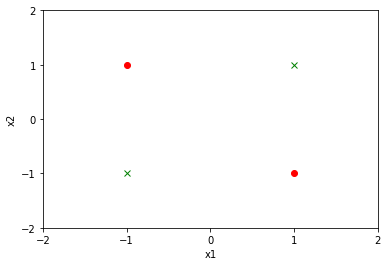

In [2]:
positive = data.loc[data['y'] == 1]
negative = data.loc[data['y'] == -1]

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xticks([-2, -1, 0, 1, 2])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(positive['x1'], positive['x2'], "ro")
plt.plot(negative['x1'], negative['x2'], "gx")
plt.show()

显然感知机无法使用一条直线将两类样本划分，异或问题是线性不可分的。

### 习题2.2

&emsp;&emsp;模仿例题 2.1，构建从训练数据求解感知机模型的例子。

**解答：**

In [3]:
from sklearn.linear_model import Perceptron
import numpy as np

X_train = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])

perceptron_model = Perceptron()
perceptron_model.fit(X_train, y)
print("w:", perceptron_model.coef_, "\nb:", perceptron_model.intercept_, "\n")

result = perceptron_model.predict(X_train)
print(result)

w: [[1. 0.]] 
b: [-2.] 

[ 1  1 -1]


### 习题2.3
证明以下定理：样本集线性可分的充分必要条件是正实例点所构成的凸壳与负实例点所构成的凸壳互不相交。

**解答：**  
**第1步：**首先给出凸壳与线性可分的定义，定义如下：  
**凸壳**  
**定义1：**设集合$S \subset R^n$，是由$R^n$中的$k$个点所组成的集合，即$S=\{x_1,x_2,\cdots, x_k\}$。定义$S$的凸壳$\text{conv}(S)$为：$$\text{conv}(S) = \left\{ x = \sum_{i=1}^k \lambda_i x_i \Big| \sum_{i=1}^k \lambda_i=1,\lambda_i \geqslant 0, i=1,2,\cdots, k \right\}$$说明：凸壳是一个集合，对于所有可能的$\lambda_i,i=1,2,\cdots,k$只要满足$\displaystyle \sum_{i=1}^k \lambda_i = 1$，那么$\displaystyle x = \sum_{i=1}^k$即为凸壳中的元素，凸壳可以用二维的图形表示如下：
<br/><center>
<img style="border-radius: 0.3125em;box-shadow: 0 2px 4px 0 rgba(34,36,38,.12),0 2px 10px 0 rgba(34,36,38,.08);width:470.17px;" src="../images/2-1-Convex-Hull.png"><br><div style="color:orange; border-bottom: 1px solid #d9d9d9;display: inline-block;color: #000;padding: 2px;">图2.1 凸壳</div></center>

**线性可分**  
**定义2：**给定一个数据集$$T=\{(x_1,y_1), (x_2,y_2), \cdots, (x_n,y_n)\}$$其中$x_i \in \mathcal{X}=R_n, y_i \in \mathcal{Y} = \{+1, -1\}, i=1,2,\cdots, n$，如果存在某个超平面$S：w \cdot x + b = 0$，能够将数据集的正实例点和负实例点完全正确划分到超平面的两侧，即对所有的正实例点即$y_i=+1$的实例$i$，有$w \cdot x_i + b > 0$，对所有的负实例点即$y_i = -1$的实例$i$，有$w \cdot x_i + b < 0$，则称数据集$T$线性可分，否则称数据集$T$线性不可分。  

----

**第2步：** 证明必要性：线性可分$\Rightarrow$凸壳不相交  
假设数据集$T$中的正例点集为$S_+$，$S_+$的凸壳为$\text{conv}(S_+)$，负实例点集为$S_-$，$S_-$的凸壳为$\text{conv}(S_-)$，若$T$是线性可分的，则存在一个超平面：$$w \cdot x + b = 0$$能够将$S_+$和$S_-$完全分离。假设对于所有的正例点$x_i$，有：$$w \cdot x_i + b = \varepsilon_i$$易知$\varepsilon_i > 0, i = 1,2,\cdots,|S_+|。$若$\text{conv}(S_+)$和$\text{conv}(S_-)$相交，即存在某个元素$s$，同时满足$s \in \text{conv}(S_+)$和$s \in \text{conv}(S_-)$。  
对于$\text{conv}(S_+)$中的元素$s^+$有$$w \cdot s^+ = w \cdot \sum_{i=1}^k \lambda_i x_i = \sum_{i=1}^k \lambda_i(\varepsilon_i - b) = \sum_{i=1}^k \lambda_i \varepsilon_i - b $$因此$\displaystyle w \cdot s^+ + b = \sum_{i=1}^k \lambda_i \varepsilon_i > 0$，同理对于$S_-$中的元素$s^-$有$\displaystyle w \cdot s^- + b = \sum_{i=1}^k \lambda_i \varepsilon_i < 0$  
由于$s \in \text{conv}(S_+)$且$s \in \text{conv}(S_-)$，则$\displaystyle w \cdot s + b = \sum_{i=1}^k \lambda_i \varepsilon_i > 0$且$\displaystyle w \cdot s + b = \sum_{i=1}^k \lambda_i \varepsilon_i < 0$，可推出矛盾。  
因此，$\text{conv}(S_+)$ 和$\text{conv}(S_-)$必不相交。从而必要性得证。  

----

**第3步：**  
证明充分性：凸壳不相交$\Rightarrow$线性可分  
假设数据集$T$中的正例点集为$S_+$，$S_+$的凸壳为$\text{conv}(S_+)$，负实例点集为$S_-$，$S_-$的凸壳为$\text{conv}(S_-)$，且$\text{conv}(S_+)$与$\text{conv}(S_-)$不相交。  
定义两个点$x_1,x_2$的距离为$$\text{dist}(x_1,x_2) = \|x_1 - x_2\|_2 = \sqrt{(x_1 - x_2)^2}$$  
定义$\text{conv}(S_+)$和$\text{conv}(S_-)$距离为$$\text{dist}(\text{conv}(S_+),\text{conv}(S_-)) = \min \|s_+ - s_-\|, s_+ \in \text{conv}(S_+), s_- \in \text{conv}(S_-)$$  
设$x_+ \in \text{conv}(S_+), x_- \in \text{conv}(S_-)$且$\text{dist}(x_+, x_-) = \text{dist}(\text{conv}(S_+),\text{conv}(S_-))$。则对于任意正例点$x$有$\text{dist}(x,x_-) \geqslant \text{dist}(x_+ , x_-)$。同理，对弈所有的负例点$x$有$\text{dist}(x,x_+) \geqslant \text{dist}(x , x_-)$。  
存在超平面$$w \cdot x + b = 0$$其中$$w = x_+ - x_- \\ b = -\frac{x_+ \cdot x_+ -  x_- \cdot x_-}{2}$$  
则对于所有的正例点$x$（易知$x \cdot x_+ + b > 0$，因此若$x_+$属于正例点，则令$x_+ \neq x$）$$\begin{aligned}
w\cdot x +b 
& = (x_+-x_-)\cdot x-\frac{x_+ \cdot x_+ - x_- \cdot x_-}{2} \\
& = x_+ \cdot x -x_- \cdot x - \frac{x_+ \cdot x_+ -x_- \cdot x_-}{2} \\
& = \frac{||x_- - x||_2^2-||x_+ - x||_2^2}{2}\\
& = \frac{\text{dist}(x,x_-)^2-\text{dist}(x,x_+)^2}{2}
\end{aligned}$$若$\text{dist}(x,x_-) \leqslant \text{dist}(x,x_+)$（即线性不可分），则$\text{dist}(x,x_-) \leqslant \text{dist}(x,x_+) \leqslant \text{dist}(x_-,x_+)$，那么$\text{dist}(\text{conv}(S_+),\text{conv}(S_-)) < \text{dist}(x_+,x_-)$，推出矛盾，因此$\text{dist}(x,x_-) > \text{dist}(x,x_+)$，即线性可分，充分性得证。  

----

**补充：**用反证法证明$\text{dist}(x,x_-) > \text{dist}(x,x_+)$  
**证明：**假设$\text{dist}(x,x_-) \leqslant \text{dist}(x,x_+)$则存在$$t=\frac{(x_{-}-x_{+})\cdot (x-x_{+})}{||x-x_{+}||_2^2}$$令$x' = tx + (1-t) x _+$，则$(x_- - x') \cdot (x_+ - x) = 0$  
易知$t \leqslant 1$，先证明$t > 0$：  
可以将$x, x_+, x_-$看做为空间中的三个不同的点，三条边的长度分别为$\text{dist}(x, x_+)，\text{dist}(x, x_-)，\text{dist}(x_+, x_-)$  
如上面可知$\text{dist}(x,x_+) \geqslant \text{dist}(x,x_-) \geqslant \text{dist}(x_-,x_+)$  
根据三角形的大边对应大角这一特性，很容易可以看出$x_+-x$与$x_+ - x_-$之间的夹角小于90度，因此$t > 0$。  
那么$\text{dist}(x',x_-) < \text{dist}(x_+,x_-)$，又因为$x'$必在$\text{conv}(S_+)$内部，故推出矛盾，所以$\text{dist}(x,x_-) > \text{dist}(x,x_+)$